# A local stack for local people, we'll have no trouble here!
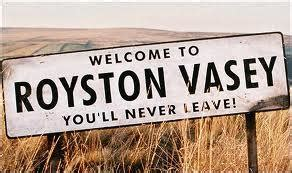

In [3]:
!date
!localstack status services

Tue 28 May 2024 12:03:55 BST
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Service                  ┃ Status      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ acm                      │ ✔ available │
│ apigateway               │ ✔ available │
│ cloudformation           │ ✔ available │
│ cloudwatch               │ ✔ available │
│ config                   │ ✔ available │
│ dynamodb                 │ ✔ available │
│ dynamodbstreams          │ ✔ available │
│ ec2                      │ ✔ available │
│ es                       │ ✔ available │
│ events                   │ ✔ available │
│ firehose                 │ ✔ available │
│ iam                      │ ✔ available │
│ kinesis                  │ ✔ available │
│ kms                      │ ✔ available │
│ lambda                   │ ✔ running   │
│ logs                     │ ✔ available │
│ opensearch               │ ✔ available │
│ redshift                 │ ✔ available │
│ resource-groups          │ ✔ available │
│ resourcegroupstaggingap

## AWS Create Simple AWS Lambda from lambda_handler.py 

In [4]:
!pwd

/Users/alan.maydwell/gits/localstack_practice


### Set some handy values

In [5]:
make_local = "--endpoint-url http://localhost:4566 --profile localstack"
function_name = "filething"

### Create Lambda

In [77]:
!zip -r function.zip lambda_handler.py

updating: lambda_handler.py (deflated 43%)


In [78]:
!aws lambda create-function --function-name {function_name} --runtime python3.10 --timeout 10 --zip-file fileb://function.zip --handler lambda_handler.lambda_handler  --role arn:aws:iam::000000000000:role/lambda-ex  --endpoint-url http://localhost:4566 --profile localstack

{
    "FunctionName": "filething",
    "FunctionArn": "arn:aws:lambda:eu-west-2:000000000000:function:filething",
    "Runtime": "python3.10",
    "Role": "arn:aws:iam::000000000000:role/lambda-ex",
    "Handler": "lambda_handler.lambda_handler",
    "CodeSize": 493,
    "Description": "",
    "Timeout": 10,
    "MemorySize": 128,
    "LastModified": "2024-05-24T14:10:57.848065+0000",
    "CodeSha256": "aCzqmFBjcjTioKhhvEFYuVi6CB3WVUPOCnr6pQESQN4=",
    "Version": "$LATEST",
    "TracingConfig": {
        "Mode": "PassThrough"
    },
    "RevisionId": "a7506d20-c50d-4f86-aa3f-5601211334c5",
    "State": "Pending",
    "StateReason": "The function is being created.",
    "StateReasonCode": "Creating",
    "PackageType": "Zip",
    "Architectures": [
        "x86_64"
    ],
    "EphemeralStorage": {
        "Size": 512
    },
    "SnapStart": {
        "ApplyOn": "None",
        "OptimizationStatus": "Off"
    },
    "RuntimeVersionConfig": {
        "RuntimeVersionArn": "arn:aws:lambda:

### Update the lambda in one go (create zip, delete old lambda, create new lambda)
(Always trys to delete old function betfor creating new. Will get `ResourceNotFoundException` if the old one does not exist, but doesn't matter)

In [12]:
!date
!zip -r function.zip lambda_handler.py
!aws lambda delete-function --function-name {function_name} {make_local}
!aws lambda create-function --function-name {function_name} --runtime python3.10 --timeout 10 --zip-file fileb://function.zip --handler lambda_handler.lambda_handler  --role arn:aws:iam::000000000000:role/lambda-ex  {make_local}

Tue 28 May 2024 09:16:33 BST
updating: lambda_handler.py (deflated 42%)

An error occurred (ResourceNotFoundException) when calling the DeleteFunction operation: Function not found: arn:aws:lambda:eu-west-2:000000000000:function:filething
{
    "FunctionName": "filething",
    "FunctionArn": "arn:aws:lambda:eu-west-2:000000000000:function:filething",
    "Runtime": "python3.10",
    "Role": "arn:aws:iam::000000000000:role/lambda-ex",
    "Handler": "lambda_handler.lambda_handler",
    "CodeSize": 493,
    "Description": "",
    "Timeout": 10,
    "MemorySize": 128,
    "LastModified": "2024-05-28T08:16:37.349969+0000",
    "CodeSha256": "BQP2c724p1gWbk33Xo14OCIcxV4db8x9Zx5XppODPfg=",
    "Version": "$LATEST",
    "TracingConfig": {
        "Mode": "PassThrough"
    },
    "RevisionId": "0eb986d5-c40b-4ad0-8fe8-c5348df43cfc",
    "State": "Pending",
    "StateReason": "The function is being created.",
    "StateReasonCode": "Creating",
    "PackageType": "Zip",
    "Architectures": [
  

### Run

In [92]:
!date
!aws lambda invoke --function-name {function_name} temp.txt  {make_local}

Fri 24 May 2024 15:26:52 BST
{
    "StatusCode": 200,
    "ExecutedVersion": "$LATEST"
}


In [13]:
!cat temp.txt

{"message": "Greetings earthling!", "event": {}, "context": "LambdaContext([aws_request_id=8b321bd2-9fc3-4f6f-81b1-6c5275f9e4a0,log_group_name=/aws/lambda/filething,log_stream_name=2024/05/24/[$LATEST]0492353c57b263c50c3b3cab4d511dda,function_name=filething,memory_limit_in_mb=128,function_version=$LATEST,invoked_function_arn=arn:aws:lambda:eu-west-2:000000000000:function:filething,client_context=None,identity=CognitoIdentity([cognito_identity_id=None,cognito_identity_pool_id=None])])", "buckets": "{'ResponseMetadata': {'RequestId': 'd2f4d080-11f2-4905-95f2-5b6a6531acde', 'HostId': 's9lzHYrFp76ZVxRcpX9+5cjAnEH2ROuNkd2BHfIa6UkFVdtjf5mKR3/eTPFvsiP/XV/VLi31234=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/xml', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'HEAD,GET,PUT,POST,DELETE,OPTIONS,PATCH', 'access-control-allow-headers': 'authorization,cache-control,content-length,content-md5,content-type,etag,location,x-amz-acl,x-amz-content-sha256,x-

### Delete lambda

In [14]:
!aws lambda delete-function --function-name {function_name} {make_local}

## S3 Bucket
### Create

In [21]:
bucket_name = "my-bucket"

In [23]:
!aws s3api create-bucket --bucket {bucket_name} --create-bucket-configuration LocationConstraint=eu-west-1 {make_local}

{
    "Location": "http://my-bucket.s3.localhost.localstack.cloud:4566/"
}


### Delete the S3

In [22]:
!aws s3 rb s3://{bucket_name} --force {make_local}

delete: s3://my-bucket/my_file.txt
remove_bucket: my-bucket


### Copy file to S3

In [26]:
cp_result = !aws s3 cp my_file.txt s3://{bucket_name} {make_local}
print(cp_result)

cp_result = !aws s3 cp excelfile.xlsx s3://{bucket_name} {make_local}
print(cp_result)

['Completed 17 Bytes/17 Bytes (1.1 KiB/s) with 1 file(s) remaining', 'upload: ./my_file.txt to s3://my-bucket/my_file.txt             ']
['Completed 4.8 KiB/4.8 KiB (328.7 KiB/s) with 1 file(s) remaining', 'upload: ./excelfile.xlsx to s3://my-bucket/excelfile.xlsx       ']


### List Files in S3

In [27]:
!aws s3 ls s3://{bucket_name} {make_local}

2024-05-28 12:16:25       4869 excelfile.xlsx
2024-05-28 12:16:24         17 my_file.txt


## Create lambda from excel_lambda_handler.py that reads an Excel File from S3 bucket using openpyxl

In [49]:
make_local = "--endpoint-url http://localhost:4566 --profile localstack"
function_name = "read_excel"
zipfile = "my_deployment_package.zip"

### Update the lambda function

In [56]:
!zip {zipfile} excel_lambda_handler.py
!aws lambda delete-function --function-name {function_name} {make_local}
!aws lambda create-function --function-name {function_name} --runtime python3.10 --timeout 10 --zip-file fileb://{zipfile} --handler excel_lambda_handler.lambda_handler  --role arn:aws:iam::000000000000:role/lambda-ex  {make_local}

updating: excel_lambda_handler.py (deflated 47%)
{
    "FunctionName": "read_excel",
    "FunctionArn": "arn:aws:lambda:eu-west-2:000000000000:function:read_excel",
    "Runtime": "python3.10",
    "Role": "arn:aws:iam::000000000000:role/lambda-ex",
    "Handler": "excel_lambda_handler.lambda_handler",
    "CodeSize": 675835,
    "Description": "",
    "Timeout": 10,
    "MemorySize": 128,
    "LastModified": "2024-05-28T12:50:47.031470+0000",
    "CodeSha256": "apC7Y22/YXBNMfrN3En+YHd3Vn0J1ituadQmPhxgiaI=",
    "Version": "$LATEST",
    "TracingConfig": {
        "Mode": "PassThrough"
    },
    "RevisionId": "1334821b-fb4f-4fd5-9a51-a33f2cc458ce",
    "State": "Pending",
    "StateReason": "The function is being created.",
    "StateReasonCode": "Creating",
    "PackageType": "Zip",
    "Architectures": [
        "x86_64"
    ],
    "EphemeralStorage": {
        "Size": 512
    },
    "SnapStart": {
        "ApplyOn": "None",
        "OptimizationStatus": "Off"
    },
    "RuntimeVer

In [57]:
!date
!aws lambda invoke --function-name {function_name} temp.txt  {make_local}

Tue 28 May 2024 13:50:50 BST
{
    "StatusCode": 200,
    "ExecutedVersion": "$LATEST"
}


In [58]:
!cat temp.txt

{"filething": "{'ResponseMetadata': {'RequestId': 'e44ea3e7-6a1d-4a3f-8c03-0e9f756f3573', 'HostId': 's9lzHYrFp76ZVxRcpX9+5cjAnEH2ROuNkd2BHfIa6UkFVdtjf5mKR3/eTPFvsiP/XV/VLi31234=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet', 'accept-ranges': 'bytes', 'last-modified': 'Tue, 28 May 2024 11:16:25 GMT', 'content-length': '4869', 'etag': '\"091b7223b20608124041796eb9dd902c\"', 'x-amz-server-side-encryption': 'AES256', 'x-amz-request-id': 'e44ea3e7-6a1d-4a3f-8c03-0e9f756f3573', 'x-amz-id-2': 's9lzHYrFp76ZVxRcpX9+5cjAnEH2ROuNkd2BHfIa6UkFVdtjf5mKR3/eTPFvsiP/XV/VLi31234=', 'connection': 'close', 'date': 'Tue, 28 May 2024 12:50:53 GMT', 'server': 'hypercorn-h11'}, 'RetryAttempts': 0}, 'AcceptRanges': 'bytes', 'LastModified': datetime.datetime(2024, 5, 28, 11, 16, 25, tzinfo=tzutc()), 'ContentLength': 4869, 'ETag': '\"091b7223b20608124041796eb9dd902c\"', 'ContentType': 'application/vnd.openxmlformats-officedocument.spr